In [1]:
import itertools
import os.path as osp

import matplotlib.pyplot as plt
import numpy as np
import pickle
from tqdm.notebook import tqdm

from marl_experiments.roshambo import roshambo_bot
from marl_experiments.roshambo.coplay_main import Demonstration


2022-11-11 08:06:47.108050: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mxsmith/.conda/envs/model38/lib


In [2]:
result_dir = "/scratch/wellman_root/wellman1/mxsmith/data/roshambo/coplay"
bot_names = roshambo_bot.ROSHAMBO_BOT_NAMES

payoffs = np.zeros([len(bot_names), len(bot_names)])

for i, j in tqdm(itertools.combinations_with_replacement(np.arange(len(bot_names)), 2)):
    name0, name1 = bot_names[i], bot_names[j]
    demonstration: Demonstration = pickle.load(open(osp.join(result_dir, f"{name0}_vs_{name1}.pb"), "rb"))

    payoffs[i, j] = np.mean(demonstration.rewards[:, :, 0])
    payoffs[j, i] = np.mean(demonstration.rewards[:, :, 1])

0it [00:00, ?it/s]

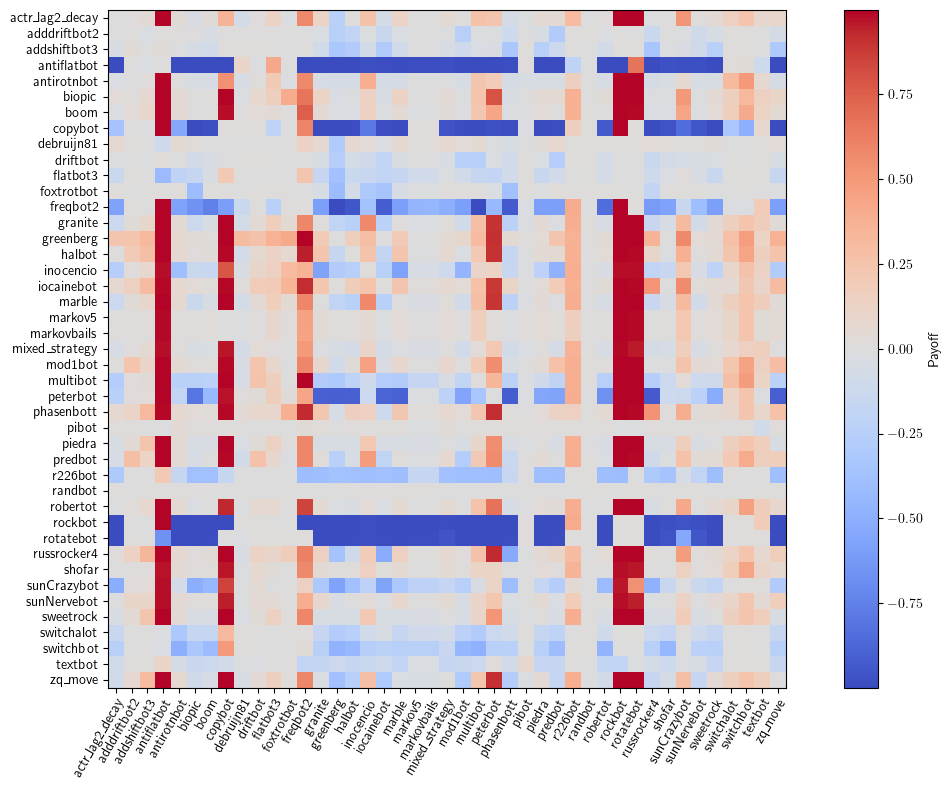

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(payoffs, cmap="coolwarm")

ax.set_xticks(np.arange(len(bot_names)), labels=bot_names)
ax.set_yticks(np.arange(len(bot_names)), labels=bot_names)

plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")

plt.colorbar(im, label="Payoff", orientation="vertical")

fig.tight_layout()
plt.show()

In [4]:
return_across_profile = np.mean(payoffs, axis=1)

sorted_indices = [x for _, x in sorted(zip(return_across_profile, np.arange(len(bot_names))), key = lambda pair: pair[0], reverse=True)]
sorted_indices = np.array(sorted_indices)

sorted_names = np.array(bot_names)[sorted_indices]

sorted_payoffs = payoffs[sorted_indices]  # Sort rows.
sorted_payoffs = sorted_payoffs[:, sorted_indices]  # Sort cols.

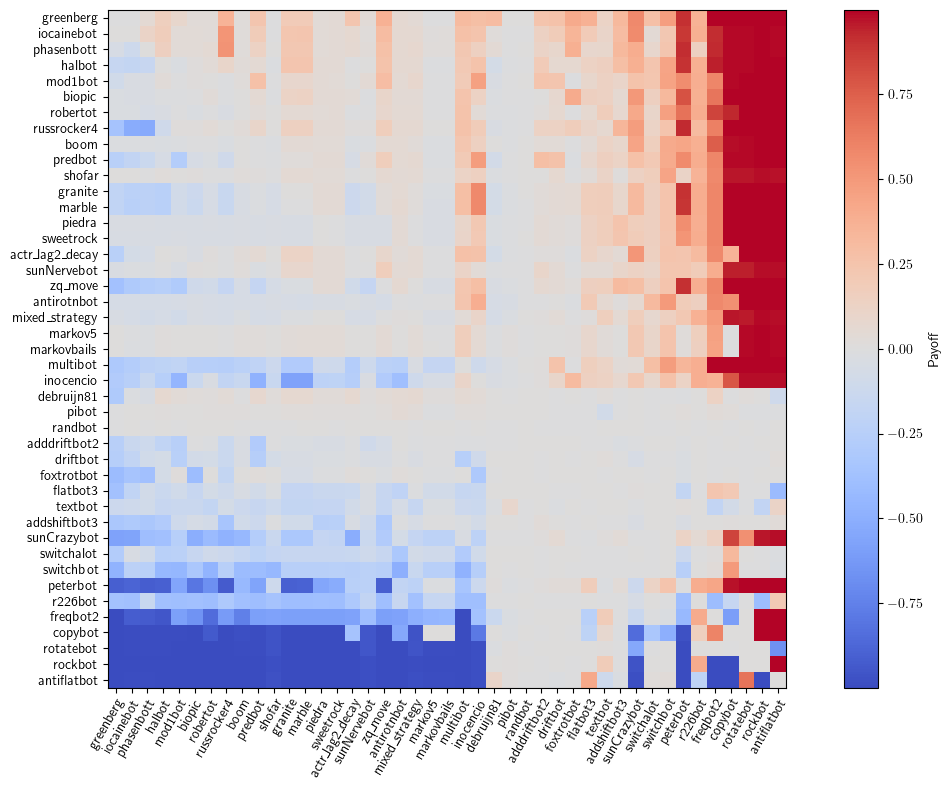

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(sorted_payoffs, cmap="coolwarm")

ax.set_xticks(np.arange(len(sorted_names)), labels=sorted_names)
ax.set_yticks(np.arange(len(sorted_names)), labels=sorted_names)

plt.setp(ax.get_xticklabels(), rotation=60, ha="right", rotation_mode="anchor")

plt.colorbar(im, label="Payoff", orientation="vertical")

fig.tight_layout()
plt.show()

In [6]:
np.mean(payoffs.diagonal())

-9.822735699894703e-05

In [15]:
print("\t".join(sorted_names))
print("\n")

greenberg	iocainebot	phasenbott	halbot	mod1bot	biopic	robertot	russrocker4	boom	predbot	shofar	granite	marble	piedra	sweetrock	actr_lag2_decay	sunNervebot	zq_move	antirotnbot	mixed_strategy	markov5	markovbails	multibot	inocencio	debruijn81	pibot	randbot	adddriftbot2	driftbot	foxtrotbot	flatbot3	textbot	addshiftbot3	sunCrazybot	switchalot	switchbot	peterbot	r226bot	freqbot2	copybot	rotatebot	rockbot	antiflatbot


